In [1]:
import scanpy as sc
import numpy as np
import os, sys

os.makedirs('../data', exist_ok=True)
os.makedirs('../data/proc', exist_ok=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Download datasets

## PBMC 3k

In [ ]:
os.makedirs('../data/pbmc3k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc3k/; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz; rm pbmc3k_filtered_gene_bc_matrices.tar.gz


In [ ]:
data_path = '../data/pbmc3k/filtered_gene_bc_matrices/hg19'
results_file = '../data/proc/pbmc3k.h5ad'
results_file2 = '../data/proc/pbmc3k.tfrecord'

In [ ]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 40
resolution = 1.0

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
#Louvain    Markers       Cell Type
#0          IL7R, CD4     T cells
#1          CD14, LYZ     CD14+ Monocytes
#2          MS4A1         B cells
#3          CD8A, CD8     T cells
#4          GNLY, NKG7    NK cells
#5          FCGR3A, MS4A7 FCGR3A+ Monocytes
#6          FCER1A, CST3  Dendritic Cells
#7          PPBP          Megakaryocytes

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14+ Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A+ Monocytes',
    'Dendritic', 'Megakaryocytes']

## PBMC 8k

In [ ]:
os.makedirs('../data/pbmc8k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc8k/; tar -xzf pbmc8k_filtered_gene_bc_matrices.tar.gz; rm pbmc8k_filtered_gene_bc_matrices.tar.gz


In [ ]:
data_path = '../data/pbmc8k/filtered_gene_bc_matrices/GRCh38/'
results_file = '../data/proc/pbmc8k.h5ad'
results_file2 = '../data/proc/pbmc8k.tfrecord'

In [ ]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 20
resolution = 0.7

In [ ]:
marker_genes = ['IL7R','CD4' ,'CD8A', 'CD8B', 
                'LYZ', 'CD14',
                'MS4A1', 
                'CD79A',
                'LGALS3', 'S100A8', 
                'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 
                'FCER1A', 'CST3', 
               ]

In [ ]:
new_cluster_names = [
    'CD4+_T-Cells',
    'CD14+_Monocytes',
        'CD8+_T-Cells',
        'CD4+_T-Cells ',
    'B_cells',
    'NK',
    'B_cells ',
    'CD4+_T-Cells  ',
    'NK ',
    'NK  ',
    'FCGR3A+_Monocytes',
    'Dendritic_cells',
    'Megakaryocytes']

## PBMC 10k

In [ ]:
os.makedirs('../data/pbmc10k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz  -O ../data/pbmc10k/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
!cd ../data/pbmc10k/; tar -xzf pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz; rm pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz


--2019-09-24 09:41:36--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 143.204.247.100, 143.204.247.31, 143.204.247.106, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|143.204.247.100|:80... 

In [3]:
os.makedirs('../data/proc', exist_ok=True)
data_path = '../data/pbmc10k/filtered_feature_bc_matrix'
results_file = '../data/proc/pbmc10k.h5ad'
results_file2 = '../data/proc/pbmc10k.tfrecord'

In [4]:
gene_up = 4500
percent_mito_up = 0.3
n_pcs = 40
resolution = 0.6

In [5]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'TRAC', 'CD8A', 'CD8B','CD4', 'LYZ', 'CD14',
                'LGALS3', 'S100A8','CD14', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7','IL6R', 'FCER1A', 'CST3', 'PPBP', 'IL3RA', 'CD40']

In [6]:
new_cluster_names = [
    'CD14+ Monocytes', 
    'Double negative T cells',
    'CD14+ Monocytes__', 
    'Double negative T cells__',
    'Mature B cell',
    'CD8 Effector', 
    'NK cells','Plasma cell','CD8 Effector__','FCGR3A+ Monocytes','CD8 Naive','Megakaryocytes','Immature B cell','CD14+ Monocytes______','Dendritic cells',
    'CD8 Effector____','pDC','Dendritic cells__']

## CLUSTER1-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER1-8k-SPLATTER'
results_file = '../data/proc/cluster1-8k-splatter.h5ad'
results_file2 = '../data/proc/cluster1-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER3-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER3-8k-SPLATTER'
results_file = '../data/proc/cluster3-8k-splatter.h5ad'
results_file2 = '../data/proc/cluster3-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER5-8k-SPLATTER

In [5]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER5-8k-SPLATTER'
results_file = '../data/proc/cluster5-8k-splatter.h5ad'
results_file2 = '../data/proc/cluste5-8k-splatter.tfrecord'

In [6]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER12-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER12-8k-SPLATTER'
results_file = '../data/proc/cluster12-8k-splatter.h5ad'
results_file2 = '../data/proc/cluste12-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

# Data preprocessing

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.0 scipy==1.3.0 pandas==0.25.0 scikit-learn==0.20.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [6]:
adata = sc.read_10x_mtx(
            data_path,  # the directory with the `.mtx` file
            var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
            cache=True)                                # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [7]:
sc.settings.set_figure_params(dpi=80)

In [8]:
adata.var_names_make_unique()  # this is unnecessary if using 'gene_ids'

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


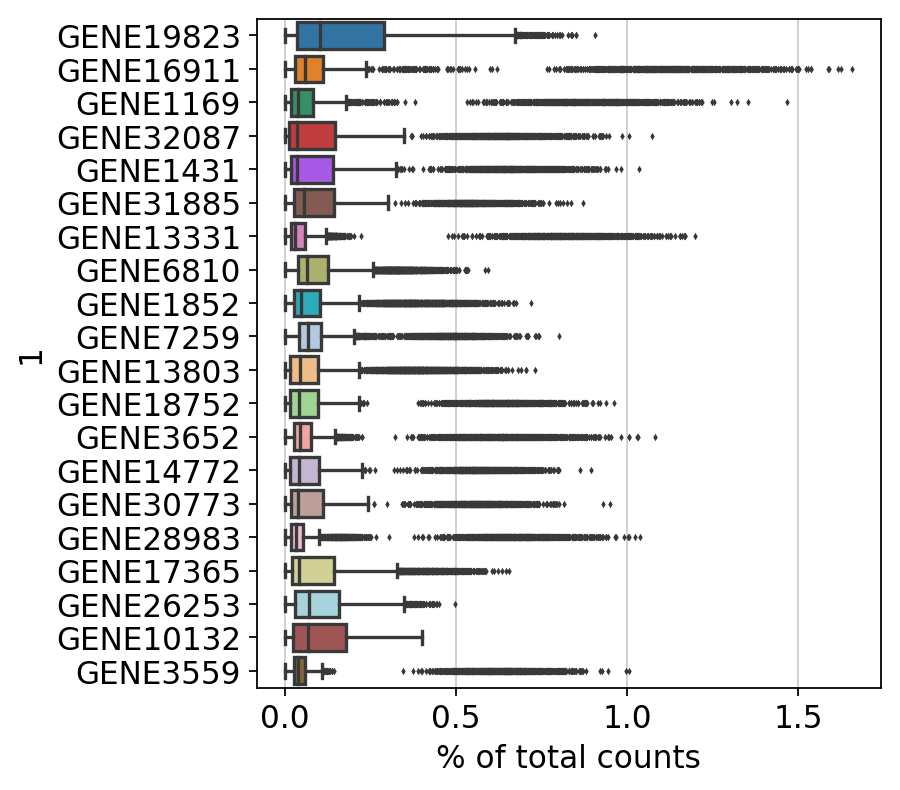

filtered out 1774 genes that are detectedin less than 3 cells


In [9]:
# Show those genes that yield the highest fraction of counts in each single cells, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20)


# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [10]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

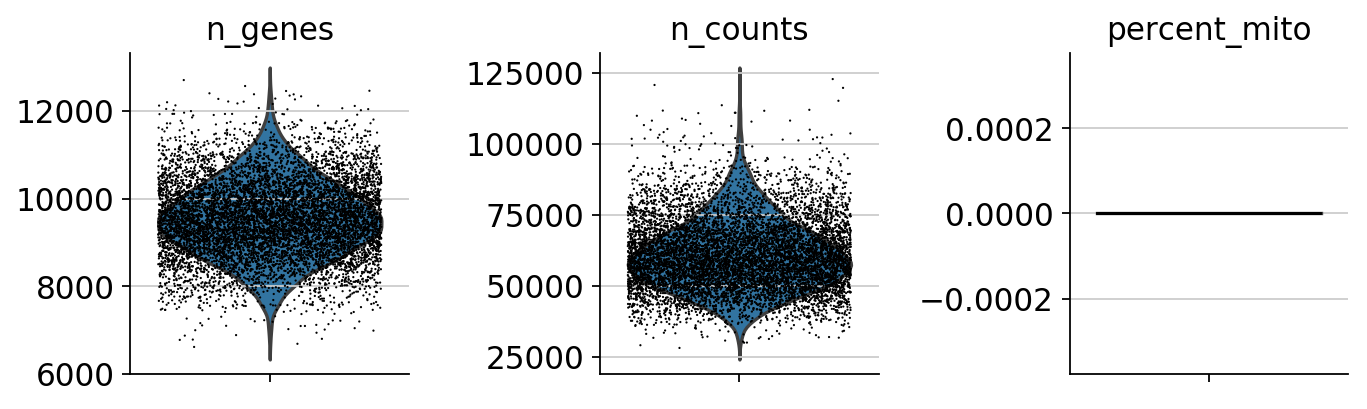

In [11]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

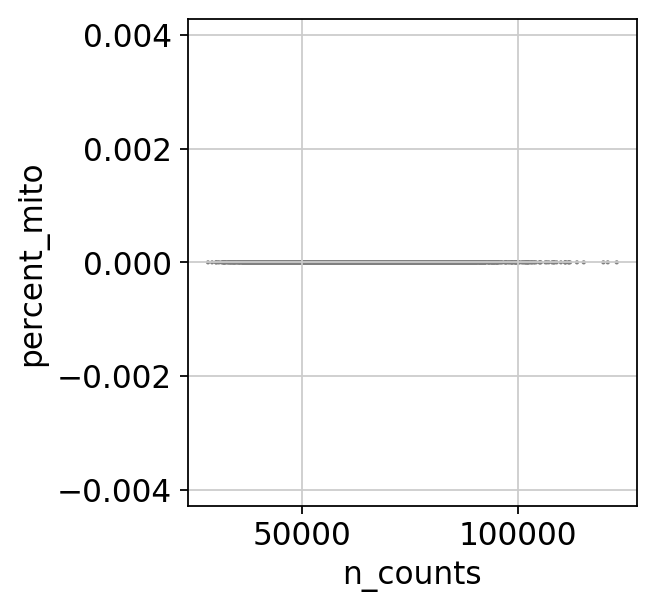

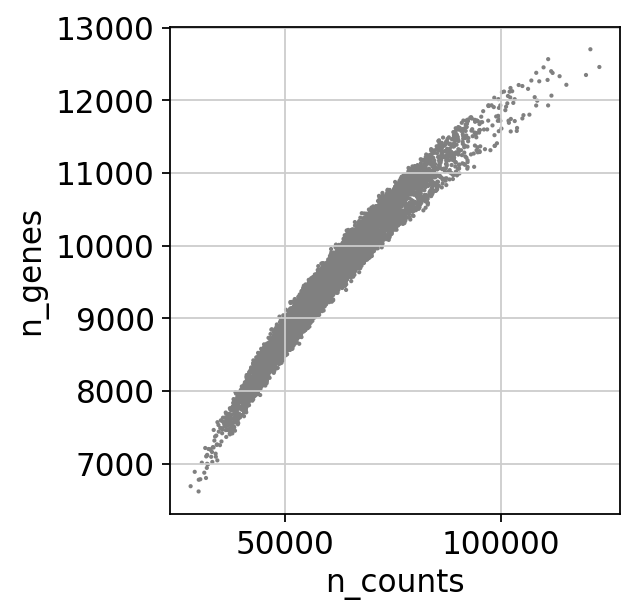

In [12]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [13]:
adata = adata[adata.obs['n_genes'] < gene_up, :] 
# adata = adata[adata.obs['percent_mito'] < percent_mito_up, :]

In [14]:
# Data in log scale
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

adata.raw = adata

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


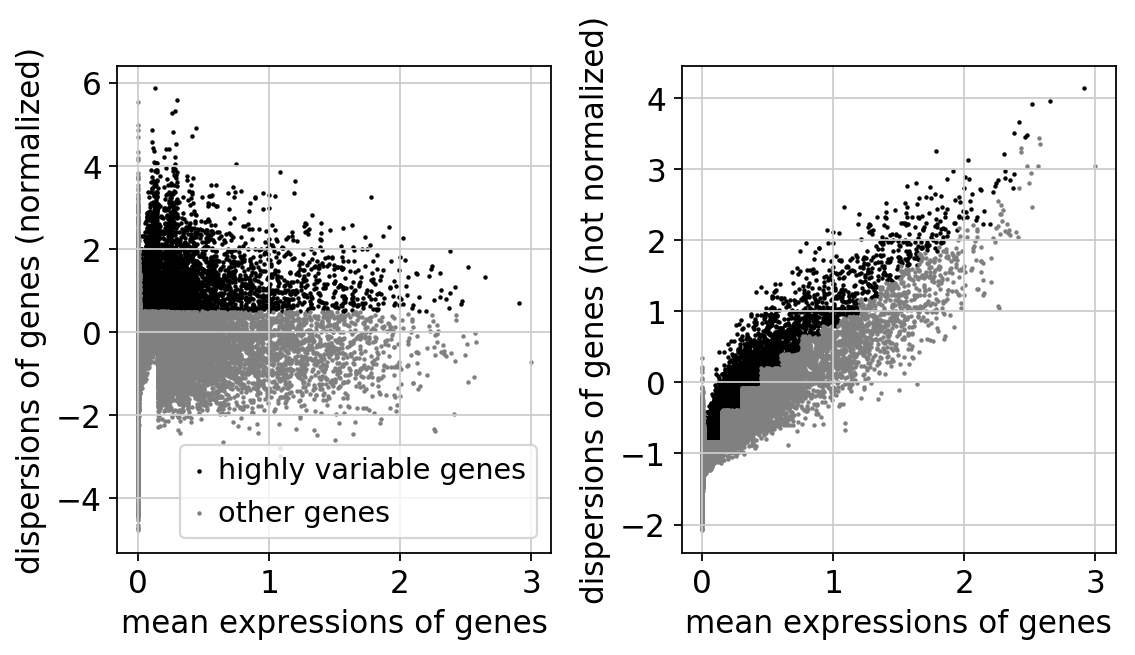

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [16]:
adata = adata[:, adata.var['highly_variable']]

In [17]:
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.regress_out(adata, ['n_counts'])

regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:02:16)


In [18]:
sc.pp.scale(adata, max_value=10)

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:11)


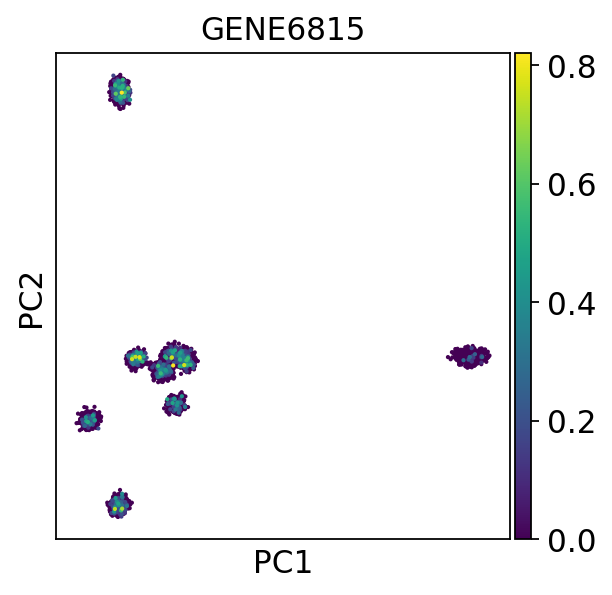

In [20]:
sc.pl.pca(adata, color='GENE6815')

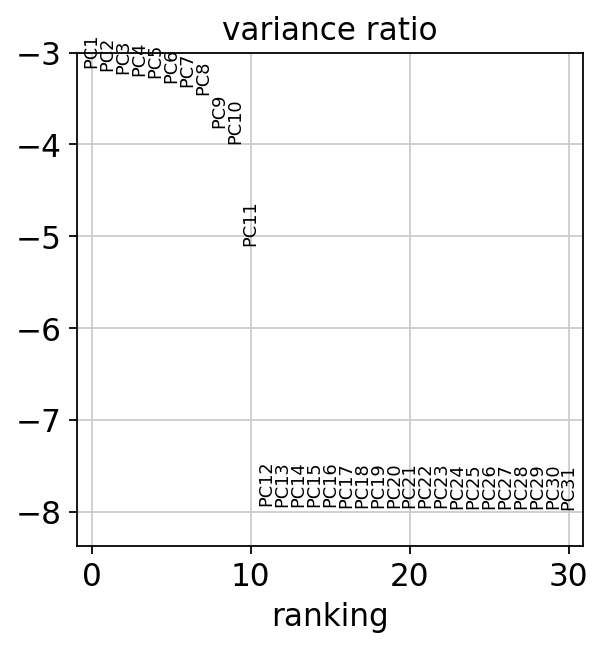

In [21]:
sc.pl.pca_variance_ratio(adata, log=True)

In [22]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:04)


In [23]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:44)


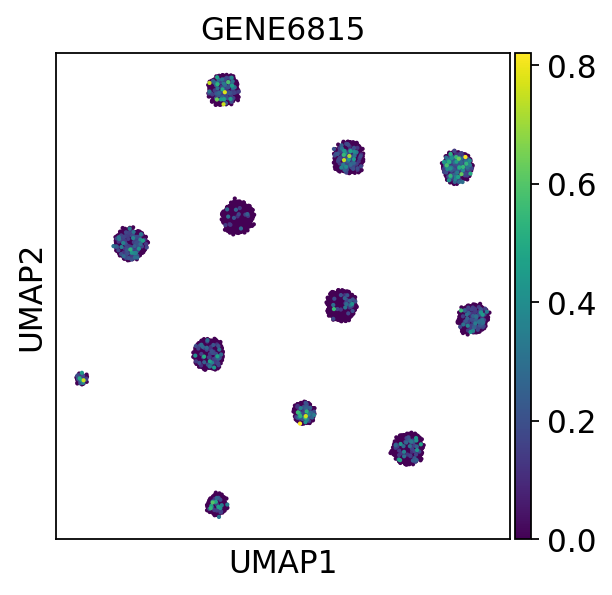

In [24]:
sc.pl.umap(adata, color=['GENE6815'])

In [25]:
sc.tl.louvain(adata, resolution=resolution)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


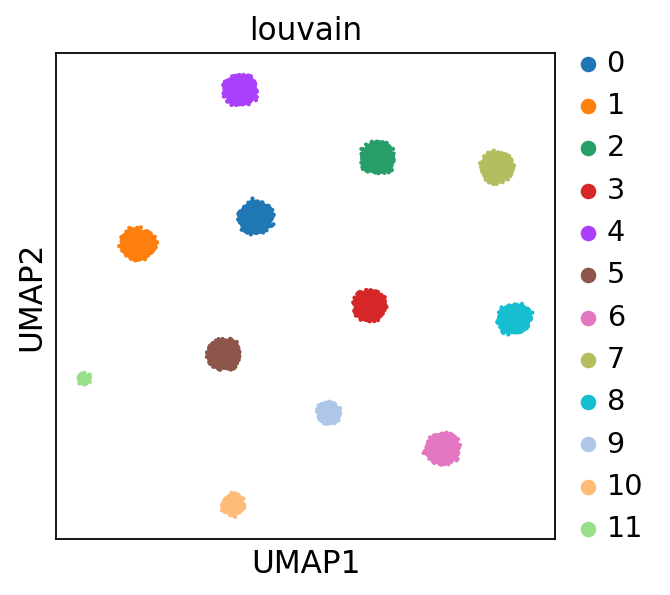

In [26]:
sc.pl.umap(adata, color=['louvain'])

In [27]:
# sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [28]:
# adata.var_names[adata.var_names.str.startswith('IG')]

In [29]:
# sc.pl.stacked_violin(adata, groupby='louvain', var_names=marker_genes);

In [30]:
try:
    sc.pl.stacked_violin(adata, groupby='louvain', var_names=marker_genes)
except:
    print("marker genes not defined for this dataset")

marker genes not defined for this dataset


In [31]:
try:
    adata.rename_categories('louvain', new_cluster_names)
except:
    print("new cluster names not defined for this dataset")

new cluster names not defined for this dataset


In [32]:
adata.obs.louvain = [ i.split('_')[0] for i in adata.obs.louvain]

del adata.uns['louvain_colors']

... storing 'louvain' as categorical


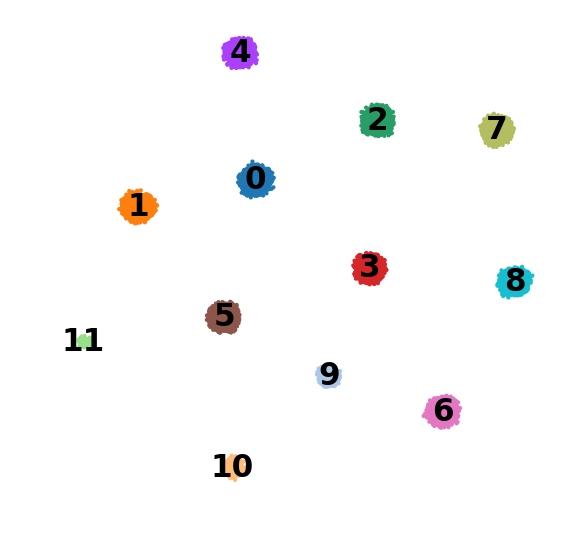

In [33]:
sc.pl.umap(adata, color='louvain', legend_loc='on data', title='', frameon=False)

In [34]:
adata.write_h5ad(results_file, compression='gzip')

In [35]:
# export file in TFRecords format

sys.path.append('../src')
from utils import export_to_tfrecord

export_to_tfrecord(results_file2, adata)

W1211 10:16:57.442955 140078085113664 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  
W1211 10:16:57.451815 140078085113664 module_wrapper.py:137] From ../src/utils.py:134: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.



In [36]:
adata

AnnData object with n_obs × n_vars = 8381 × 7860 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [37]:
adata.var['gene_ids']

1
GENE9            ENSG00009
GENE10          ENSG000010
GENE14          ENSG000014
GENE16          ENSG000016
GENE17          ENSG000017
                 ...      
GENE33680    ENSG000033680
GENE33686    ENSG000033686
GENE33687    ENSG000033687
GENE33688    ENSG000033688
GENE33692    ENSG000033692
Name: gene_ids, Length: 7860, dtype: object